## CS6650 Homework 2 (Holi 2023 Semester)

---
Name: `Hari Hara Naveen S`

Roll No: `CS21B033`

Email: `cs21b033@smail.iitm.ac.in`

---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Preliminary Analysis of PPG Sensor Signals
Refer to the PPG sensor logs shared in the class lecture wiki. Your task is to perform some preliminary analysis on the same dataset. It consists of three columns, a UNIX epoch timestamp in milliseconds, photodiode responses (digitized) for the IR led and the Red led, respectively. For the rest of the document, we will refer to these digital signals as IR and RED. 

Create a directory, `<Your_Roll>_CS6650H23`. Place this notebook and the dataset file in that directory. Now you will perform the following tasks:

1. [Visualize the data (5 points)](#task1)
2. [Peak detection (15 points)](#task2)
3. [Frequency domain analysis (32 points)](#task3)
4. [Spectrograms (20 points)](#task4)
5. [Quantization of sensor data (28 points)](#task5)

Please keep in mind,

- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required this time. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not directly address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $2^{nd}$, April, 2023**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.

In [2]:
dataPath = "sample.csv"
df = pd.read_csv(dataPath)

### Task 1: Visualize the data [5 points] <a id='task1'></a>
Read the dataset into memory.
1. Plot the IR and RED signals in the time domain - approx length of samples ~32.14 seconds.
2. What is the sample rate at which the data has been collected? Is it uniform? If not, what is the standard deviation?

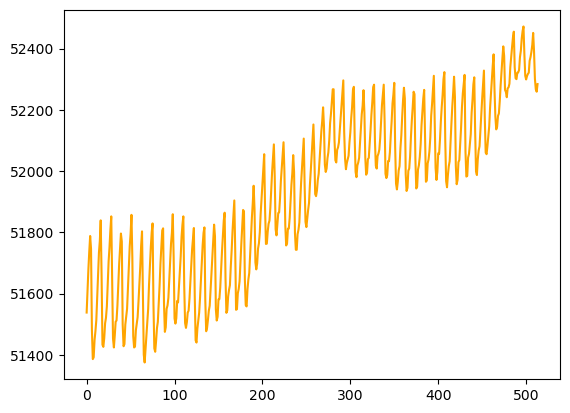

Text(0.5, 1.0, 'IR Samples')

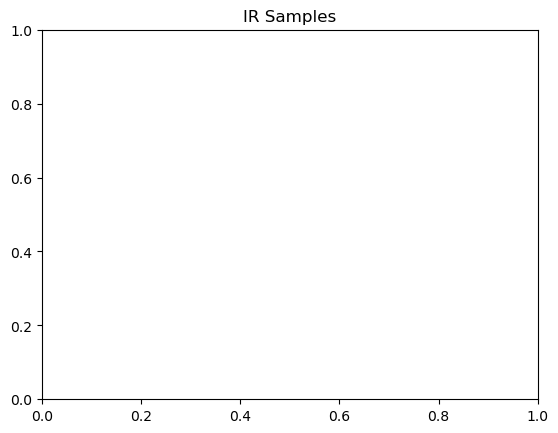

In [3]:
plt.plot(df["IR"], color = "orange")
plt.show()
plt.title("IR Samples")


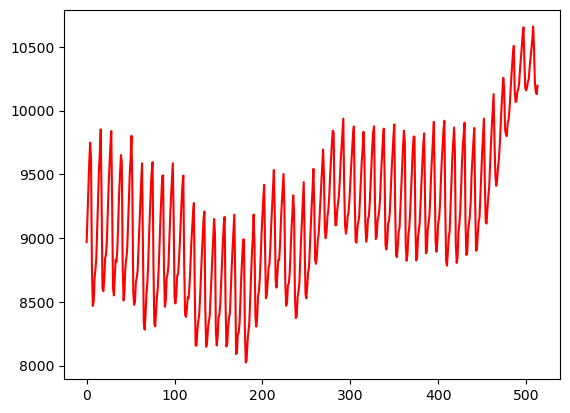

Text(0.5, 1.0, 'Red Samples')

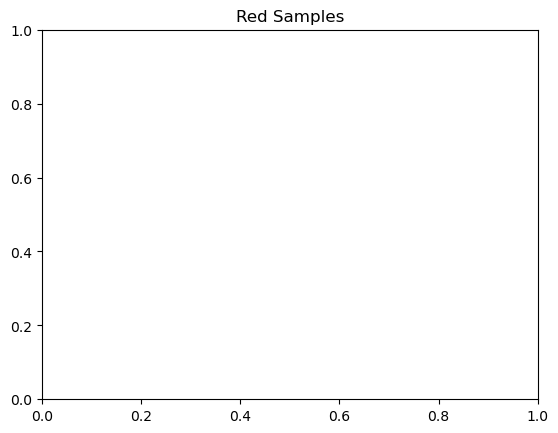

In [4]:
plt.plot(df["RED"], color = "red")
plt.show()
plt.title("Red Samples")


In [5]:
timestamps = df["time"]
timeDeltas = np.diff(timestamps)
np.std(timeDeltas)

5.203245745403795

In [6]:
samplesPerSecond = np.array([])
i,j=0,0
while(j < len(timestamps)):
    if(timestamps[j] - timestamps[i] <=1000):
        j=j+1
    else:
        samplesPerSecond = np.append(samplesPerSecond, (j-i))
        i = j+1
print(samplesPerSecond)
print("Standard Deviation is :",np.std(samplesPerSecond))


[16. 17. 17. 17. 17. 16. 17. 16. 17. 16. 16. 17. 16. 17. 16. 17. 16. 17.
 17. 17. 16. 17. 17. 17. 17. 16. 16. 17. 16.]
Standard Deviation is : 0.4925123054167483


In [7]:
samplesPerSecond = np.array([])
i,j=0,0
while(j < len(timestamps)):
    if(timestamps[j] - timestamps[i] <=1000):
        j=j+1
    else:
        samplesPerSecond = np.append(samplesPerSecond, (j-i))
        i = i+1
print(samplesPerSecond)
print("Standard Deviation is :",np.std(samplesPerSecond))


[16. 16. 16. 17. 17. 17. 17. 17. 17. 17. 16. 17. 17. 17. 17. 17. 17. 17.
 17. 16. 16. 16. 16. 16. 16. 16. 17. 16. 16. 16. 17. 17. 16. 16. 17. 17.
 16. 16. 17. 17. 17. 17. 16. 17. 17. 17. 16. 17. 17. 17. 17. 17. 17. 17.
 16. 16. 16. 16. 17. 16. 16. 16. 17. 16. 16. 16. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 16. 17. 17. 17. 16. 16. 16. 16. 17. 16. 16. 16.
 16. 16. 16. 16. 17. 16. 16. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 16. 16. 16. 16. 16. 17. 16. 16. 16. 17. 16. 16. 16.
 16. 16. 16. 16. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 16. 17. 16. 16. 16. 17. 16. 16. 16. 16. 15. 15. 15. 16. 16. 16.
 16. 16. 16. 16. 16. 16. 16. 16. 16. 17. 17. 17. 16. 16. 16. 16. 16. 16.
 16. 16. 16. 16. 16. 16. 17. 16. 16. 16. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 17. 17. 17. 17. 16. 17. 16. 16. 16. 16. 16. 16. 17. 16.
 16. 16. 17. 16. 16. 16. 17. 16. 16. 17. 17. 17. 17. 17. 17. 17. 17. 17.
 17. 17. 17. 17. 16. 17. 17. 16. 16. 16. 16. 16. 16

In [8]:
dps = 1000 / np.mean(timeDeltas) 
# 16 datapoints persecond

**No**, the sample rate is not perfectly uniform



**Standard Deviation of time differences** : 5.203245745403795

**Sample Rate** : Approximately 16 samples per second

**Standard Deviation of Sample Rate (samples per second)** : 
Based of definition

0.49 (std of samples in chunks of 1 second)

0.51 (std of number of samples in a 1 second frame after sample i)

In [9]:
from scipy import signal as scipysig

### Task 2: Peak detection [5 + 10 = 15 points] <a id='task2'></a>
Your task is to detect peaks in the time domain data using the `scipy.signal.find_peaks` method on both IR and RED signals.
1. Plot the peak locations for the signals. Do the peak indices between the two signals match?
2. Calculate the BPM using a sliding window of size 4 seconds. Plot BPM versus time.

Text(0.5, 1.0, 'Red Samples')

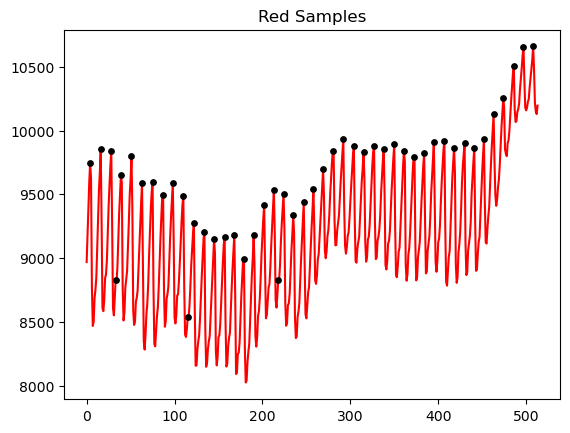

In [10]:
signal = df["RED"]
RED_peaks = scipysig.find_peaks(signal)[0]
plt.plot(signal, color = "red", zorder=-1)
plt.scatter([i for i in RED_peaks], [signal[i] for i in RED_peaks], color = "black", s = 15)
plt.title("Red Samples")


Text(0.5, 1.0, 'IR Samples')

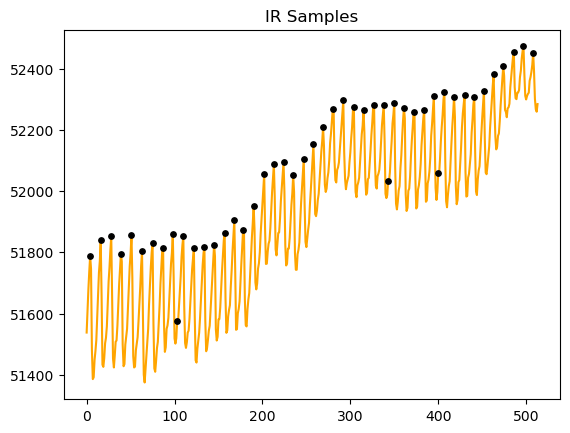

In [11]:
signal = df["IR"]
IR_peaks = scipysig.find_peaks(signal)[0]
plt.plot(signal, color = "orange", zorder=-1)
plt.scatter([i for i in IR_peaks], [signal[i] for i in IR_peaks], color = "black", s = 15)
plt.title("IR Samples")



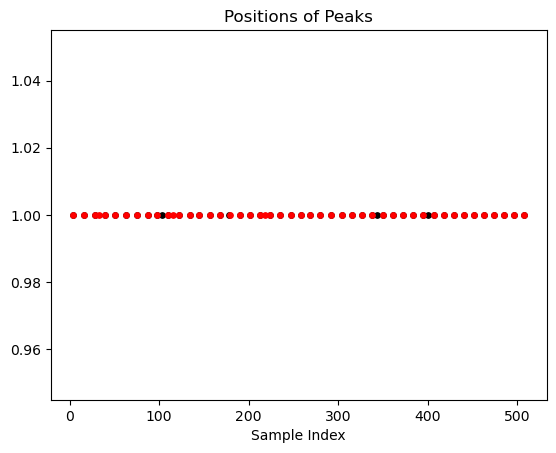

In [12]:
plt.title("Positions of Peaks")
plt.xlabel("Sample Index")
plt.scatter([i for i in IR_peaks], [1 for i in RED_peaks], color = "black", s = 15)
plt.scatter([i for i in RED_peaks], [1 for i in RED_peaks], color = "red", s = 15)


In [13]:
print(RED_peaks)
print(IR_peaks)


[  4  16  28  33  39  51  63  75  87  98 110 115 122 134 145 157 168 179
 190 202 213 218 224 235 247 258 269 280 292 304 315 327 338 350 361 373
 384 395 407 418 430 441 452 463 474 486 497 508]
[  4  16  28  39  51  63  75  87  98 103 110 122 134 145 157 168 178 190
 202 213 224 235 247 258 269 280 292 304 315 327 338 343 350 361 372 384
 395 400 407 418 430 441 452 463 474 486 497 508]


In [14]:
print("RED_PEAKS - IR_PEAKS = ", np.setdiff1d(RED_peaks, IR_peaks))
print("IR_PEAKS - RED_PEAKS = ", np.setdiff1d(IR_peaks, RED_peaks))

RED_PEAKS - IR_PEAKS =  [ 33 115 179 218 373]
IR_PEAKS - RED_PEAKS =  [103 178 343 372 400]


In [15]:
# Calculating BPM using red peaks
beatsIn4Sec = []
bpm_it1 = 0
bpm_it2 = 0
timestamps = df["time"]

SLIDING_WINDOW = 4000

while(bpm_it2 < len(RED_peaks)):
    if(timestamps[RED_peaks[bpm_it2]] - timestamps[RED_peaks[bpm_it1]] <= SLIDING_WINDOW):
        bpm_it2 += 1
    else:
        beatsIn4Sec.append(bpm_it2-bpm_it1)
        bpm_it1 += 1

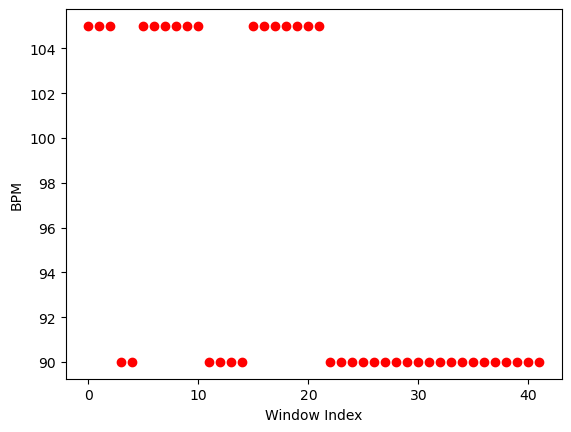

In [16]:
bpm = np.array(beatsIn4Sec) * (60//4)
plt.ylabel("BPM")
plt.xlabel("Window Index")
plt.scatter([i for i in range(len(bpm))], bpm, color = "red")


In [17]:
print(np.mean(bpm))
print(np.mean(beatsIn4Sec))

95.71428571428571
6.380952380952381


##### Observations Task 2

Peak indices are approximately match, except for a few indices

Number of Hearbeats for a sliding window of 4 seconds is 6 or 7 (averages out to 6.38)
Hence BPM is 90 or 105 for each interval (averages out to 95.71)


<div class="alert alert-block alert-warning">
<b>Note:</b> For Tasks 3, 4 and 5 use only the RED channel data (no need to use IR data).
</div>

In [18]:
import math

### Task 3: Frequency domain analysis [2 + 20 + 10 = 32 points] <a id='task3'></a>
1. What is the maximum frequency value that can be tracked in the provided signals?
2. Implement a function realizing the **coiling machine analogy** as discussed in class with detailed comments.
3. Run the coiling machine for `N = 32`, `64`, `128`, `256`, and `512` samples. Report the BPM values obtained in these five settings in a table. Validate the output with the library function `numpy.fft.fft`. Show the heatmaps as a 2x5 *subplot*. Label them properly. The top row corresponds to your function, while the bottom row corresponds to the numpy FFT implementation.

In [19]:
# Maximum frequency which can be tracked is ~8Hz

In [20]:
# coiling machine functions
# nth sample is at 2pi * K * n / N in W[K]
PI = math.pi
sin = math.sin
cos = math.cos

"""
K is the frequency component
N is number samples to be considered
function returns weight when coiled of frequency K
"""
def coiling_machine(K, N, signal):
    truncatedSignal = signal[0:N]
    xWeights, yWeights = np.array([]), np.array([])
    for i in range(N):
        # angle corresponding to the sample
        angle =  2 * PI * K * i / N
        x, y = cos(angle), sin(angle)
        xWeights = np.append(xWeights, [x * signal[i]])
        yWeights = np.append(yWeights, [y * signal[i]])
    xcom, ycom = np.mean(xWeights), np.mean(yWeights)
    return math.sqrt(xcom ** 2 + ycom ** 2)

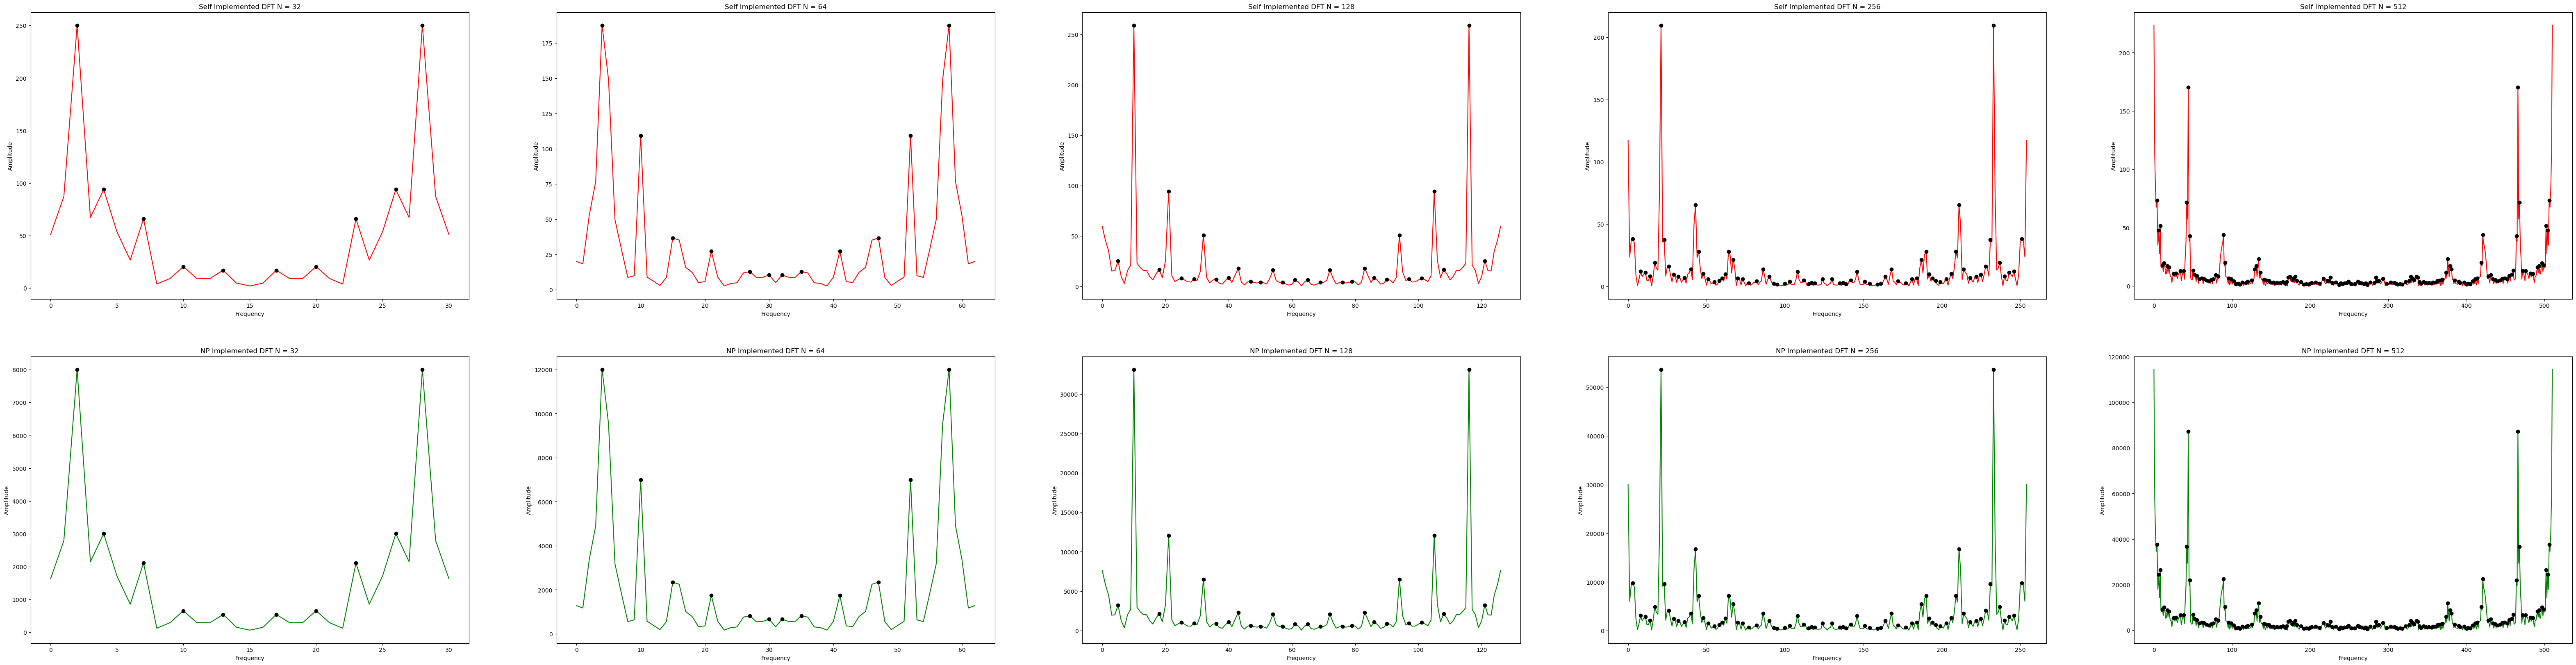

In [21]:
FFT_sig = df["RED"]
f, axarr = plt.subplots(2,5)
f.set_figwidth(80)
f.set_figheight(20)
for i in range(5):
    N = 2 ** (i+5)
    data = [coiling_machine(i, N, df["RED"]) for i in range(N)][1:]
    peaks = scipysig.find_peaks(data)[0]
    
    axarr[0,i].set_xlabel("Frequency")
    axarr[0,i].set_ylabel("Amplitude") 
    axarr[0,i].set_title(f"Self Implemented DFT N = {N}")
    
    axarr[0,i].plot(data, color = "red", zorder = -1)
    axarr[0,i].scatter([i for i in peaks], [data[i] for i in peaks], color = "k")
    
    
for i in range(5):
    N = 2 ** (i+5)
    data = np.absolute(np.fft.fft(df["RED"], n = N)[1:])
    peaks = scipysig.find_peaks(data)[0]
    
    axarr[1,i].set_xlabel("Frequency")
    axarr[1,i].set_ylabel("Amplitude") 
    axarr[1,i].set_title(f"NP Implemented DFT N = {N}")
    
    axarr[1,i].plot(data, color = "green", zorder = -1)
    axarr[1,i].scatter([i for i in peaks], [data[i] for i in peaks], color = "k")



In [22]:
dps = 1000 / np.mean(timeDeltas) # number of datapoints per second
# We will assume highest amplitude in the 0.7 to 1.7 Hz range corresponds to heartbeat
def getBPM(signal, fft_bin):
    N = fft_bin
    data = [coiling_machine(i, N, signal) for i in range(N)][1:N//2]
    begin = int(0.5 * N / dps)
    end = int(1.7 * N / dps)
    maxVal, maxIndex = -1, 0
    for i in range(begin, end):
        if(data[i] > maxVal):
            maxIndex = i
            maxVal = data[i]
    return 60*maxIndex*16/N

for i in range(5, 10):
    print(f"Observed BPM for N = {1<<i} is {getBPM(df['RED'], 1<<i)}")
    

Observed BPM for N = 32 is 60.0
Observed BPM for N = 64 is 60.0
Observed BPM for N = 128 is 75.0
Observed BPM for N = 256 is 78.75
Observed BPM for N = 512 is 82.5


##### Observations Task 3

Maximum frequency of approximately 8Hz (=sample_rate / 2) can be tracked by the signal 

Sample rate is approximately 16 sample per second

Edit this section to put your observations.

| N         | BPM   |
| --------  | ------|
| 32        | 60.00 |
| 64        | 60.00 |
| 128       | 75.00 |
| 256       | 78.75 |
| 512       | 82.50 |

Counting heart rate using peaks gives us an higher value as there are false positives

### Task 4: Spectrograms [10 + 10 = 20 points] <a id='task4'></a>
1. Plot the time-frequency spectrogram of the above data using your coiling machine function, taking a moving average window of size 2, 8, and 16 seconds. Show the heatmaps as a 1x3 *subplot*. Label them properly.
2. Add gaussian noise to the samples with a mean of 200 and a standard deviation of 50. Run the above analysis (4.1) again. Validate any improvement brought in by the 16 second window over the 2 or 8 second ones.

In [23]:
PI = math.pi
def binned_coiling_machine(signal, bins=32):
    if(len(signal) <= bins):
        signal = np.pad(signal, (0, 32-len(signal)),"constant",constant_values = (0))
    weights = np.array([])
    
    for i in range(1,len(signal)):
        f = dps*i/len(signal) # corresponding frequency
        xcom, ycom = 0,0
        for j in range(len(signal)):
            angle = f*j/dps * 2*PI # angle corresponding to signal[j]
            xcom = xcom + (signal[j] * math.cos(angle))
            ycom = ycom + (signal[j] * math.sin(angle))
        weights = np.append(weights, math.sqrt(xcom**2  + ycom**2))
#     return weights
    binned_weights = [0 for i in range(32)]
    for i in range(bins):
        f = dps * i /bins
        w_index = f * len(signal) // 16
        
        binned_weights[i] = weights[int(w_index)]

    binned_weights[0] = 0 
    # we set weight corresponding to freq=0 to be 0 as it does not matter
    return binned_weights[:bins//2]

    

        

In [24]:
def generateSpecGram(signal, windowMaxSize, bins=32):
    sigLen = signal.shape[0]
    specY,specX = bins//2, sigLen
    specGram = np.zeros(shape = (specX, specY))
    window = np.array([])
    end = 0
    begin = 0
    while(end < sigLen ):
        if(timestamps[end] - timestamps[begin] <= windowMaxSize*1000):
            window = np.append(window, signal[i])
            end+=1
        else:
            fft = binned_coiling_machine(signal[begin:end], bins)
            for f_comp in range(specY):
                specGram[begin][f_comp] = fft[f_comp]
            begin+=1
    print(begin)
    return specGram[:begin]
            
            

In [25]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

In [26]:
signal = np.array(df["RED"])
specGram1 = generateSpecGram(signal, 2)
specGram2 = generateSpecGram(signal, 8)
specGram3 = generateSpecGram(signal, 16)

specGrams = [specGram1, specGram2, specGram3]

482
386
258


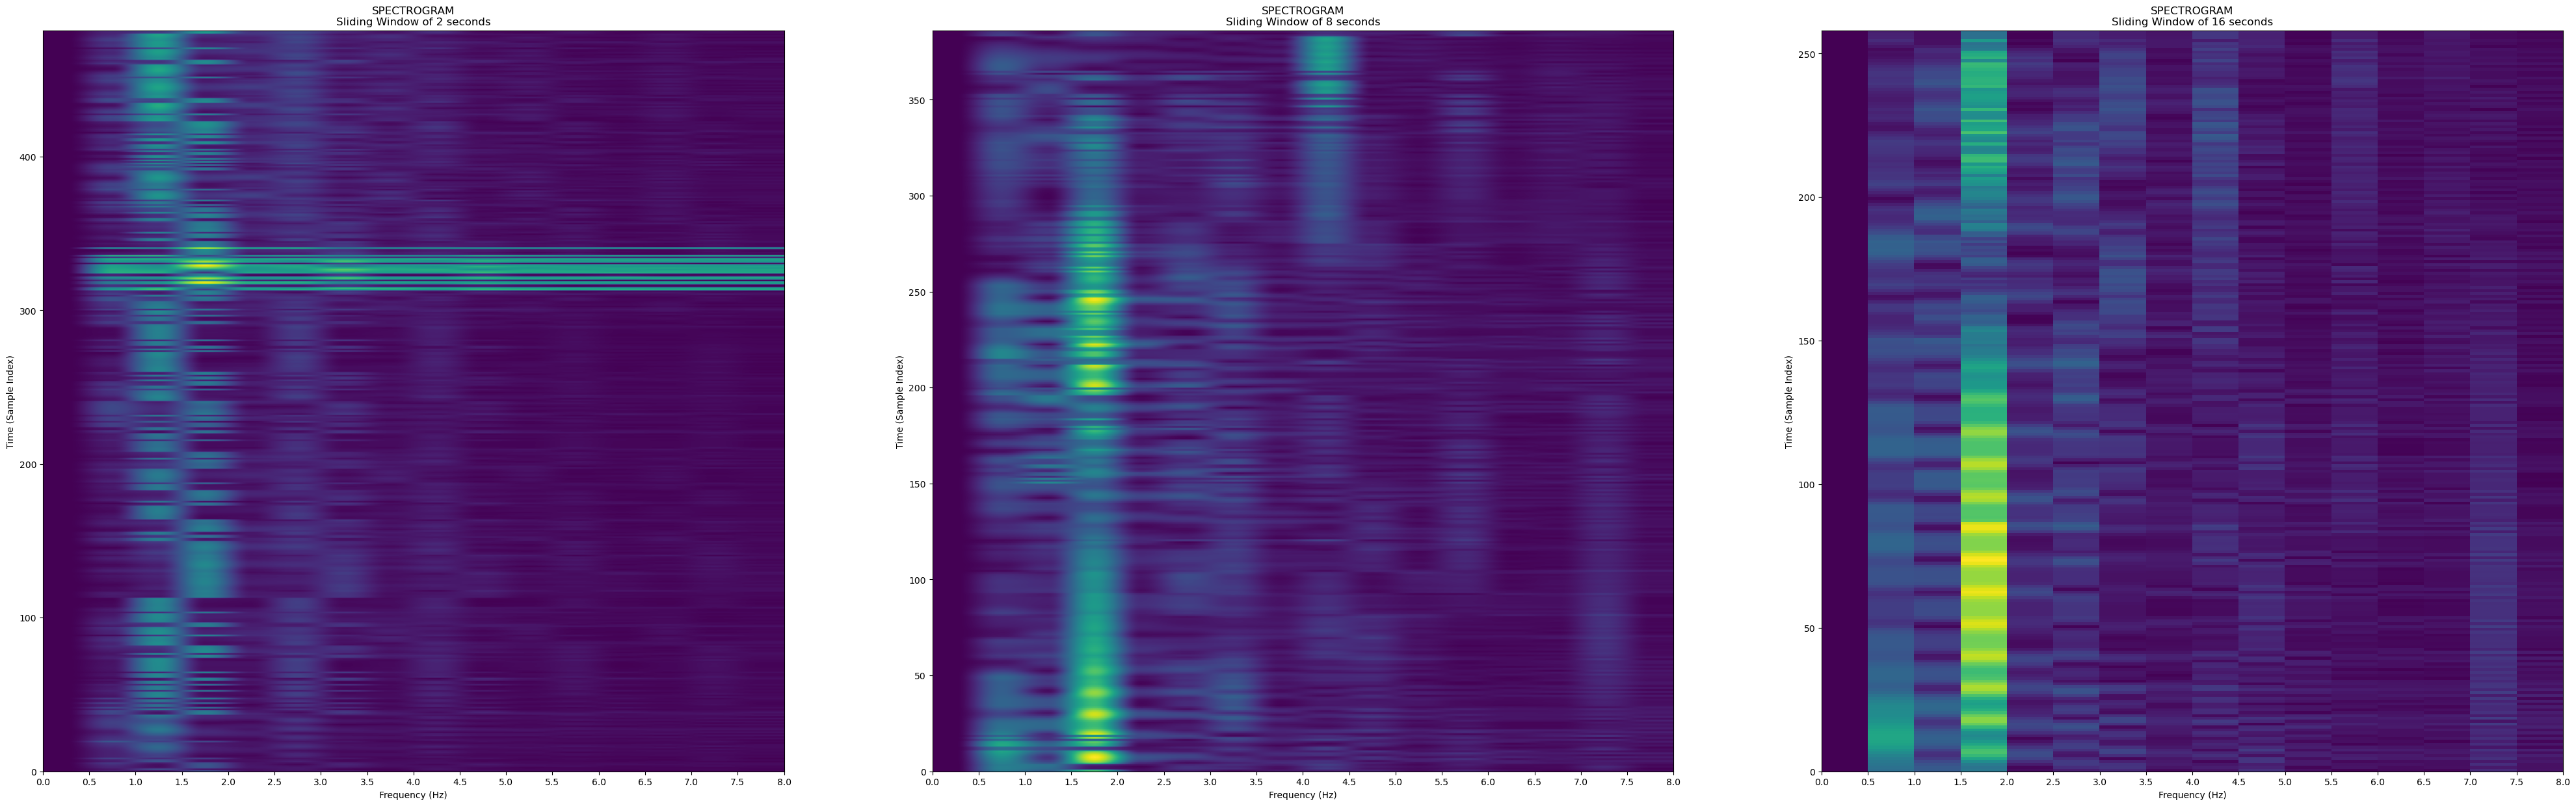

In [27]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(50)
fig.set_figheight(50)


ax[0].set_title("SPECTROGRAM\nSliding Window of 2 seconds")
ax[1].set_title("SPECTROGRAM\nSliding Window of 8 seconds")
ax[2].set_title("SPECTROGRAM\nSliding Window of 16 seconds")

xticks = [i/2 for i in range(18)]
for i in range(len(specGrams)):
    ax[i].set_xlabel("Frequency (Hz)")
    ax[i].set_ylabel("Time (Sample Index)")
    
    ax[i].set_xticks(xticks)
    ax[i].imshow(specGrams[i], extent = [0,8,0,len(specGrams[i])])
    forceAspect(ax[i], aspect = 1)
    
# NOTE : for freq=0 fft weight is set to 0 as it does not hold any significance



In [28]:
def add_guassian_noise(sig, mu, std):
    sigCopy = np.copy(sig)
    noise = np.random.normal(mu, std)
    return sigCopy + noise

In [29]:
signalNoised = add_guassian_noise(np.array(df["RED"]), 200, 50)
specGramNoised1 = generateSpecGram(signalNoised, 4)
specGramNoised2 = generateSpecGram(signalNoised, 8)
specGramNoised3 = generateSpecGram(signalNoised, 16)

specGramsNoised = [specGramNoised1, specGramNoised2, specGramNoised3]

449
386
258


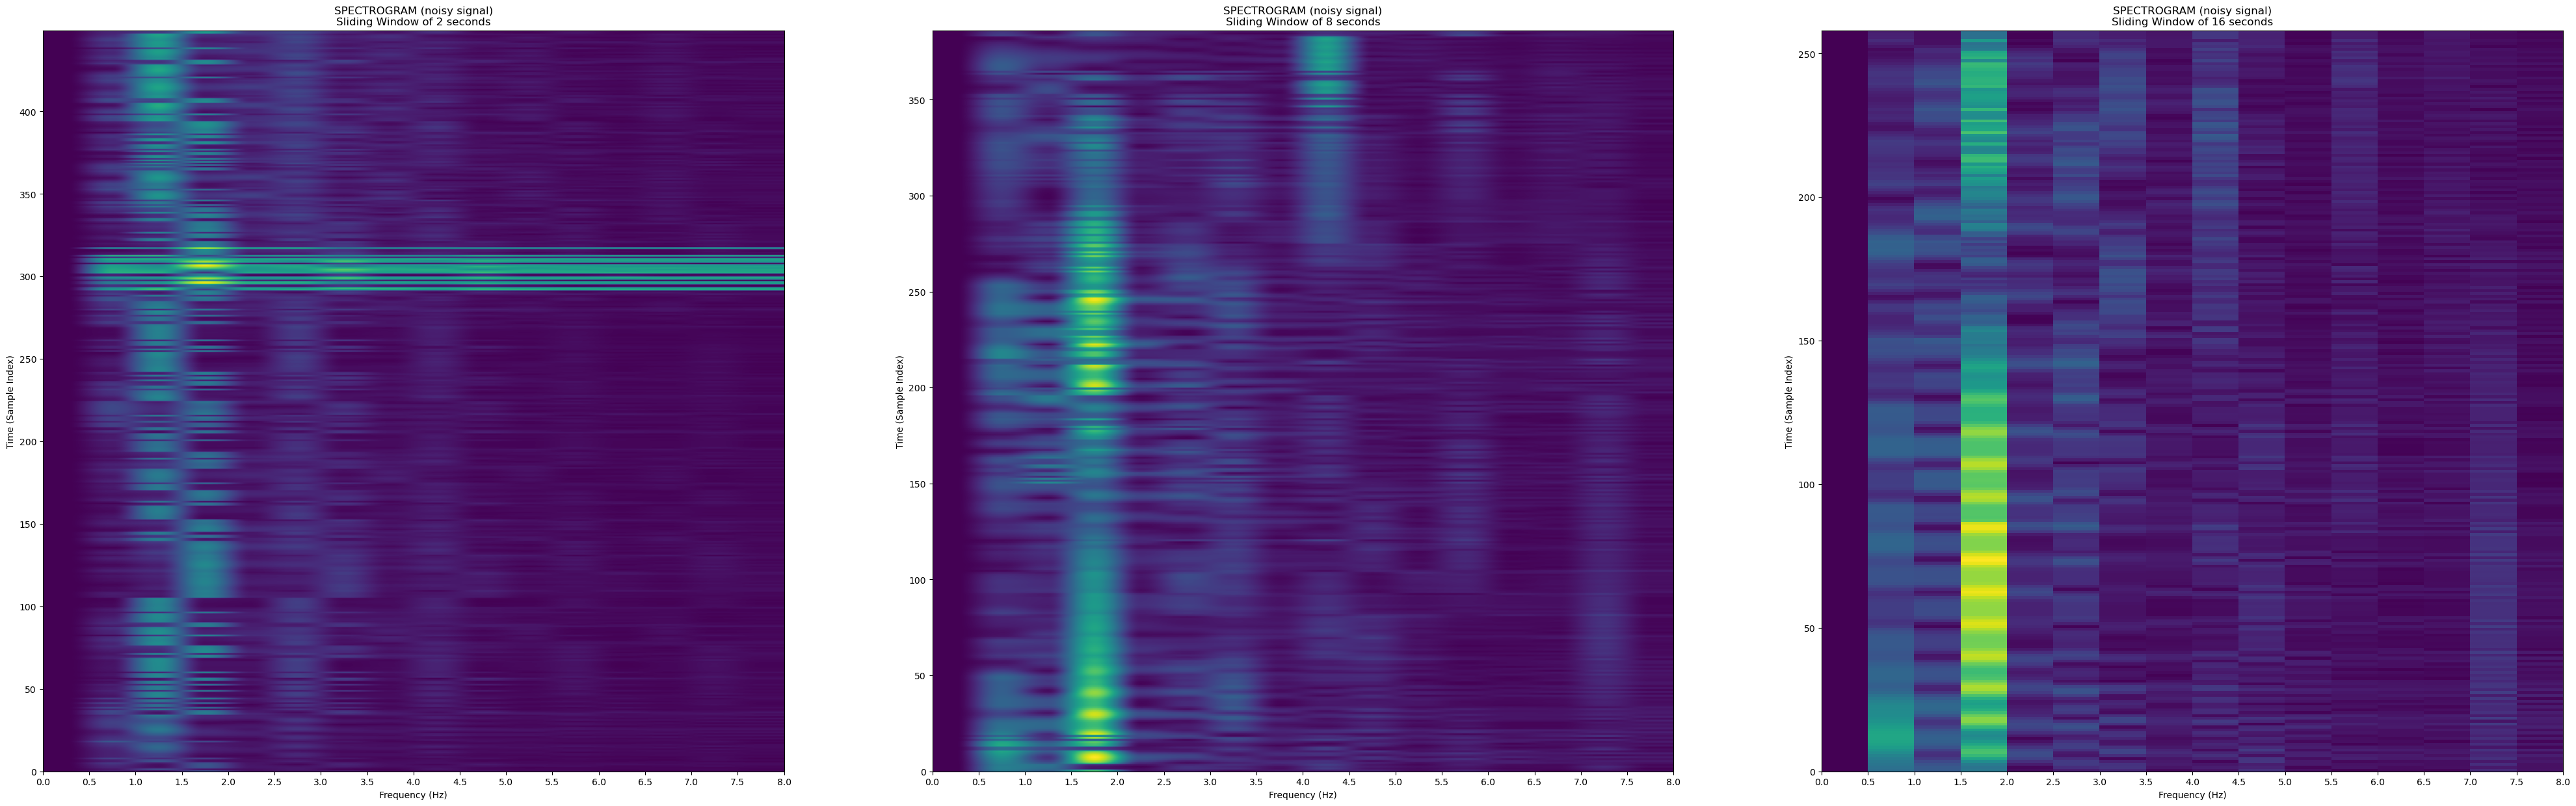

In [30]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(50)
fig.set_figheight(50)

ax[0].set_title("SPECTROGRAM (noisy signal)\nSliding Window of 2 seconds")
ax[1].set_title("SPECTROGRAM (noisy signal)\nSliding Window of 8 seconds")
ax[2].set_title("SPECTROGRAM (noisy signal)\nSliding Window of 16 seconds")

xticks = [i/2 for i in range(18)]
for i in range(len(specGramsNoised)):
    ax[i].set_xlabel("Frequency (Hz)")
    ax[i].set_ylabel("Time (Sample Index)")
    
    ax[i].set_xticks(xticks)
    ax[i].imshow(specGrams[i], extent = [0,8,0,len(specGramsNoised[i])])
    forceAspect(ax[i], aspect = 1)


##### Observations Task 4

Spectrogram (even in noisy environment) with sliding window of 16 seconds has a more pronounced band corresponding to heartbeat.

This is because we use guassian noise which averages to a constant over a larger number of samples, 16 second sliding window has larger number of samples than 2 or 4 sliding window

### Task 5: Quantization of sensor data [5 + 15 + 8 = 28 points] <a id='task5'></a>
Assume that a 16-bit ADC was used in the sensor that maps the range 0 to 5 volts.
1. How many bits would have sufficed at the minimum without losing the accuracy of the signal?
2. Now start lowering the number of bits (of course virtually), one at a time, up to a minimum of 2 bits, and represent the data with the relevant number of bits. Plot detected BPM versus the number of ADC bits. To detect BPM, directly use a 512-bin FFT on all the samples.
3. Does the plot in 5.2 change if we consider the noisy samples as produced in 4.2?

In [31]:
signal = df["RED"]

In [32]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


In [33]:
signal = df["RED"]
snr = signaltonoise(signal, axis=0, ddof=0) 
10 * math.log10(snr) / 6.02


2.0410961454270415

atleast 3 bits are required

3 Bits would have sufficed

In [34]:
def drop_ADC_size(signal, initSize, finalSize, rangeMax = 5):
    assert(initSize >= finalSize)
    
    analogValue = signal * 5 / (1 << initSize) 
    signalScaled = analogValue * (1<<finalSize) // 5
    
    return  signalScaled
    
    
    

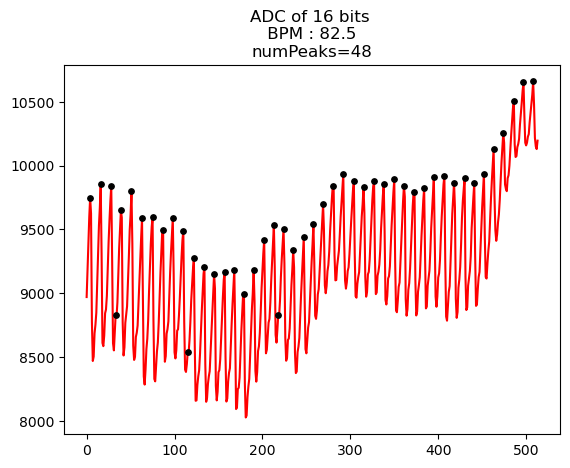

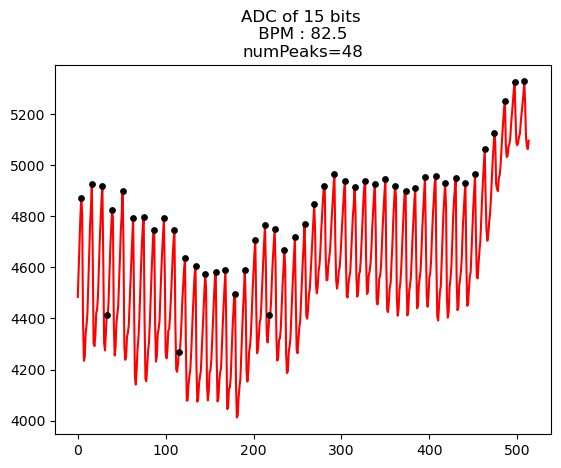

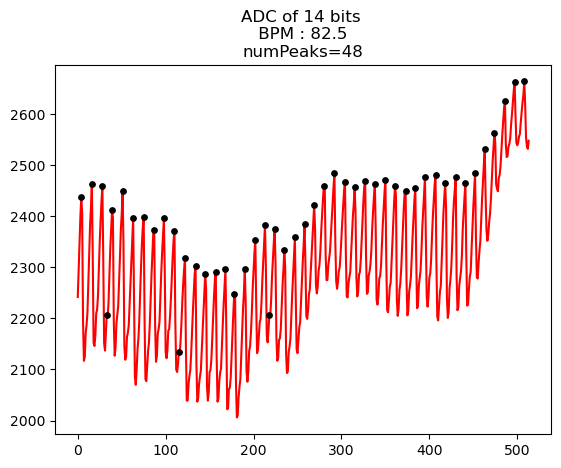

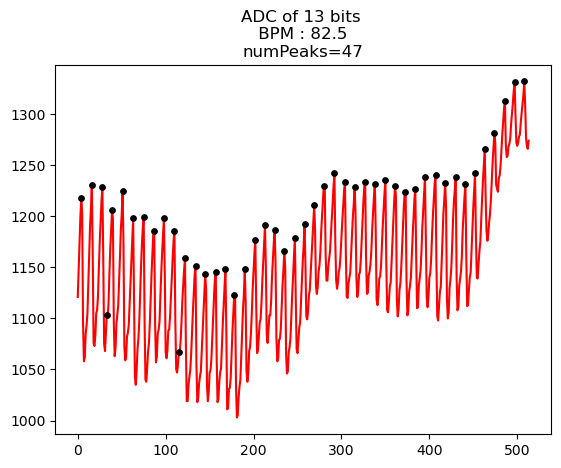

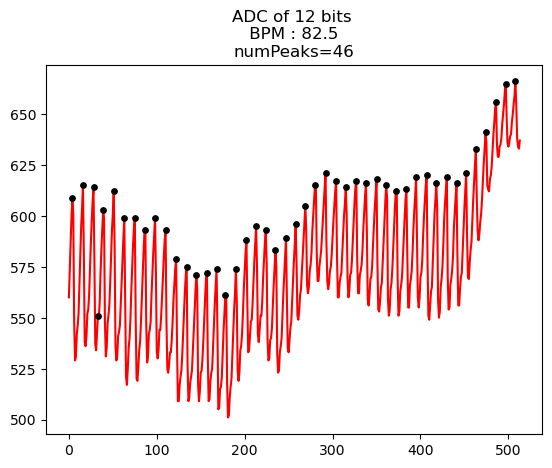

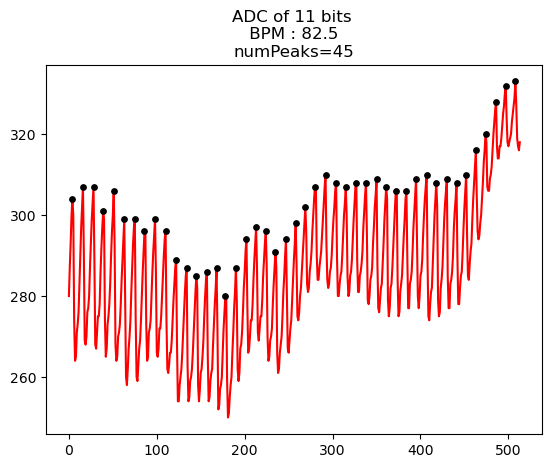

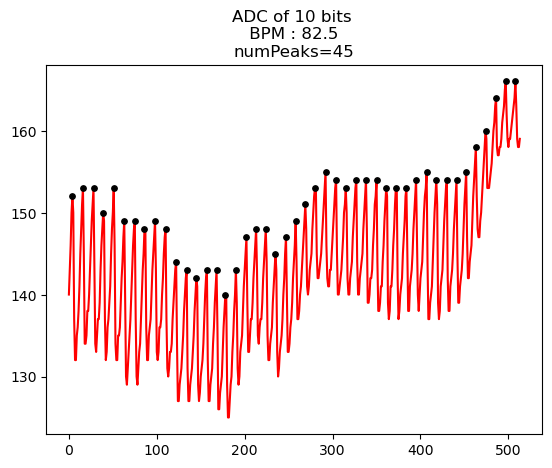

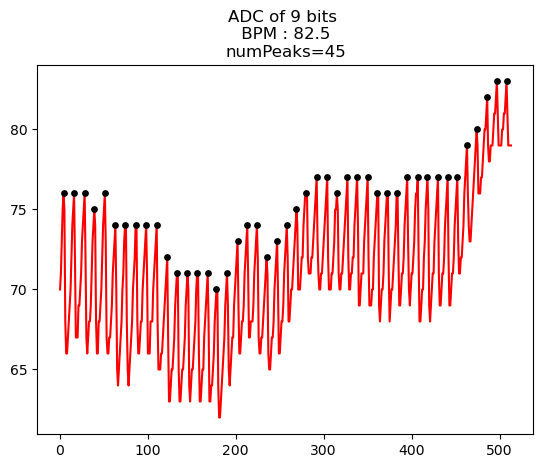

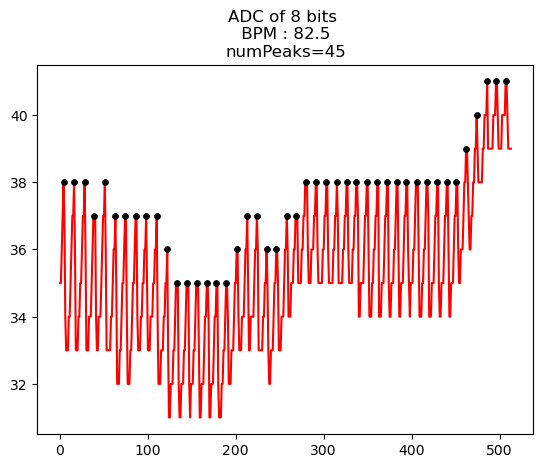

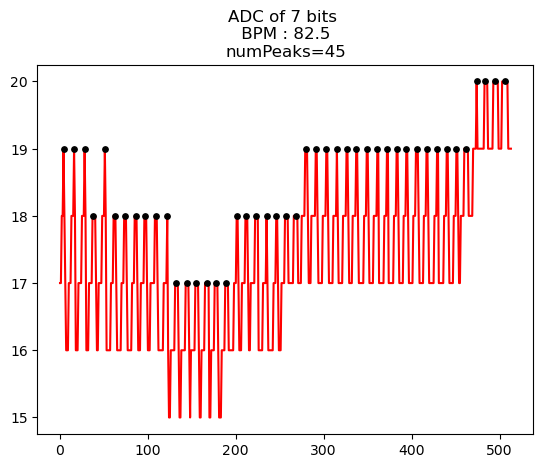

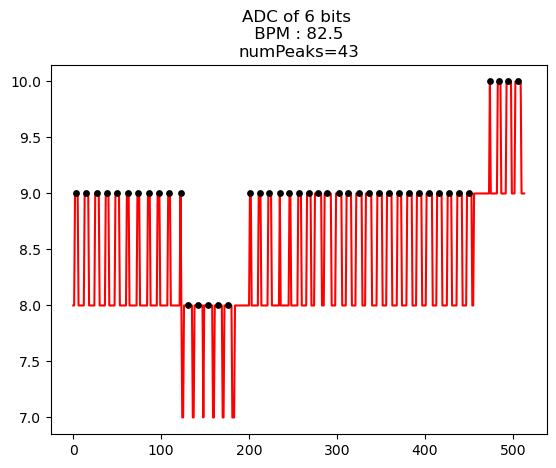

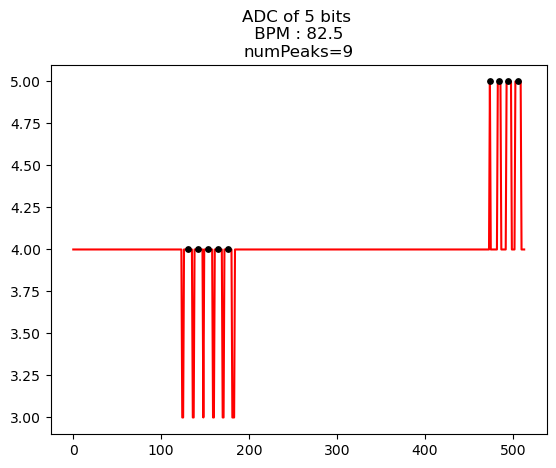

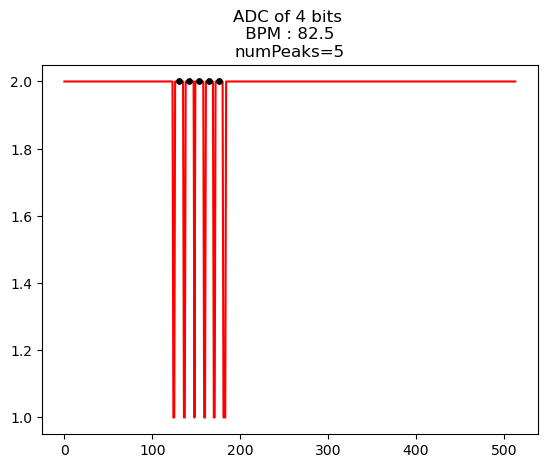

In [ ]:
signal = np.array(df["RED"])
for finalSize in range(16, 0, -1):
    sigLowered = drop_ADC_size(signal, 16, finalSize)
    peaks = scipysig.find_peaks(sigLowered)[0]
    plt.title(f"ADC of {finalSize} bits \n BPM : {getBPM(sigLowered, 512)} \nnumPeaks={len(peaks)}")
    plt.plot(sigLowered, color = "red", zorder=-1)
    plt.scatter([i for i in peaks], [sigLowered[i] for i in peaks], color = "black", s = 15)
    plt.show()


As seen even from FFT, atleast 3 bits are required for measuring heart rate

In [ ]:
signalNoisy = add_guassian_noise(signal, 200, 16)
snrNoisy=signaltonoise(signal, axis=0, ddof=0) 
10 * math.log10(snrNoisy) / 6.02


In [ ]:
signal = signalNoisy
for finalSize in range(16, 0, -1):
    sigLowered = drop_ADC_size(signal, 16, finalSize)
    peaks = scipysig.find_peaks(sigLowered)[0]
    plt.title(f"ADC of {finalSize} bits (Noisy) \n BPM : {getBPM(sigLowered, 512)} \nnumPeaks={len(peaks)}")
    plt.plot(sigLowered, color = "red", zorder=-1)
    plt.scatter([i for i in peaks], [sigLowered[i] for i in peaks], color = "black", s = 15)
    plt.show()


##### Observations Task 5

Edit this section to put your observations.

1. Using the formula we find that 3 bit ADC should have sufficed in detecting peaks
2. Plotted above
3. Yes, because we have added noise, SNR has increased and therefore we need more ADC bits to accurately find the peaks. We now need >5 bits to accurately find the BPM

NOTE : We find the highest amplitude frequency component in the 0.7 to 1.4 Hz range this helps us correctly predict BPM even for lower ADC bit size